## Step1 : Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10) # width, height in inches

## Step2: Loading the Home Prices into a DataFrame

In [3]:
dataframe1 = pd.read_csv("Bengaluru_House_Data.csv")
dataframe1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Step3: Understanding the Data

In [4]:
# Get the no of rows and columns
dataframe1.shape

(13320, 9)

In [5]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
dataframe1['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
27 BHK           1
19 BHK           1
13 BHK           1
16 BHK           1
18 Bedroom       1
43 Bedroom       1
12 Bedroom       1
14 BHK           1
Name: size, dtype: int64

In [7]:
dataframe1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
#Get all the column names
dataframe1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
#Let get the count of trianing examples for each area type
dataframe1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# Step4: Dropping the Columns

* By Going through these attributes/features, there are some of the features which can be ignored/skipped for the sake of the project. So, we drop few columns


In [10]:
# Note everytime we make change in dataset we store it in new dataframe
dataframe2 = dataframe1.drop(['area_type', 'availability', 'society', 'balcony'],axis='columns')

print('Rows and columns are = ', dataframe2.shape)
dataframe2.head()

Rows and columns are =  (13320, 5)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Some Basic Visualization by plotting Histograms

array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

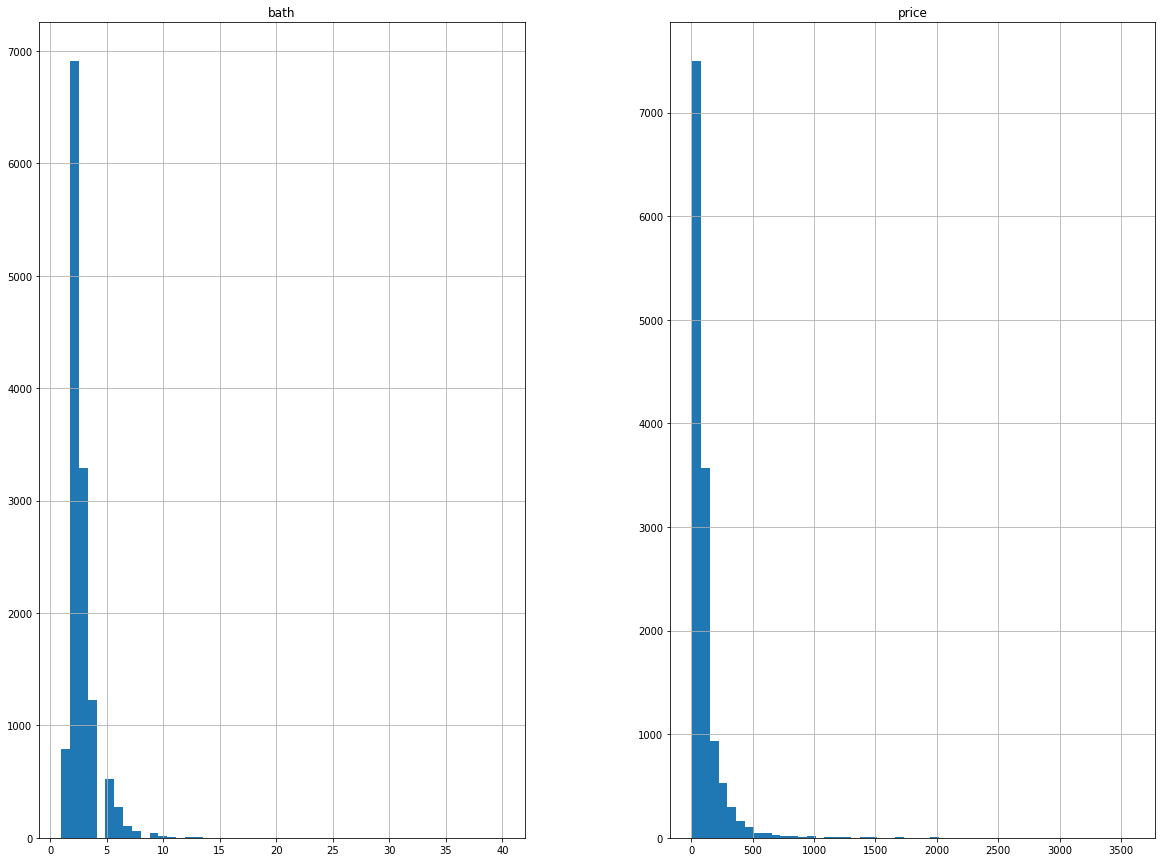

In [11]:
dataframe2.hist(bins = 50, figsize = (20, 15))

## Step5: Clean the Datasets as it may contain these of the values
* NULL or NA values in some of the Datarows or columns.
* Similar values of each of the columns.
* Some logically wrong or incorrect values (such as 2 BHK Home with 40000 sqft area)

## Eliminating the NA or NULL values from the Datarows

In [12]:
# function to print the count of NA or NULL values count
def print_count_of_NA_datarows(dataframe):
    print(dataframe.isna().sum(), "\n");
    print(dataframe.isnull().sum());

# lets check the count of each of the NA values as
print_count_of_NA_datarows(dataframe2)

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


As the Count of the rows is 13320 which is much much larger than these count of NA values, so we can drop these datarows which contains the NA or NULL values.

In [13]:
#dropping the NA values containg datarows 
dataframe3 = dataframe2.dropna()
print_count_of_NA_datarows(dataframe3)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64 

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


In [14]:
#lets analyze the new dataset after dropping NA values datarows
def config_dataset(dataframe):
    print("Rows and columns are: ", dataframe.shape, "\n")
    print(dataframe.info(), "\n")
    print(dataframe.describe())

config_dataset(dataframe3)

Rows and columns are:  (13246, 5) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB
None 

               bath         price
count  13246.000000  13246.000000
mean       2.692586    112.389392
std        1.341506    149.076587
min        1.000000      8.000000
25%        2.000000     50.000000
50%        2.000000     72.000000
75%        3.000000    120.000000
max       40.000000   3600.000000


## Mapping the column containing irregular values
* 'size' column contains the value in terms of BHK(Bedroom Hall Kitchen), Bedroom which needs to be scaled into a particular numerical value.
* For the sake of simplicity, we add a new column bhk containing only the numerical value of the BHK without the paramter like BHK or Bedroom.

In [15]:
#lets check the unique value of the 'size' column as
dataframe3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
#function for getting the numerical value from the string
def get_Numeric_values(x):
    value = (int(x.split(' ')[0]))
    return value;

dataframe4 = dataframe3.copy();
dataframe4['bhk'] = dataframe3['size'].apply(get_Numeric_values)
dataframe4.bhk.unique()    

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
#Getting the training examples with home size more than 20 BHK
dataframe4[dataframe4.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Now, it is clearly observable that house with 43 bhk cannot be built on an area of just 2400 sqft, thus it is a wrong entry and we need to clean the total_sqft column.

In [18]:
# Now lets check the unique values of the 'total_sqft' column
dataframe4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Now, we have to convert its type from object to some numeric value as it contains some values in the range like '1133 - 1384' which we will be converted by taking the average of both the two values.

In [19]:
#function to identify these kind of value '1133 - 1384'
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# Test the function
print('is this (1024) float value = %s' % (is_float(1024)))
print('is this (1133 - 1384) float value = %s' % (is_float('1133 - 1384')))

is this (1024) float value = True
is this (1133 - 1384) float value = False


In [20]:
# Now, applying the is_float function to the total_sqft column

#Now, lets see the 'total_sqft' rows where value is not float
dataframe4[~dataframe4['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


* Since most the value are range of sqft, we can write a function to get the average value from a range.

* There are few values like '34.46Sq. Meter' and '4125Perch' we can also try and convert those values into sqft but for now we are going to ignore/skip them.

In [21]:
# function to convert the range values to sqft
def convert_range_to_sqft(x):
  try:
    tokens = x.split('-')

    if len(tokens) == 2:
      return (float(tokens[0]) + float(tokens[1]))/2
    else:
      return float(x)
  except:
    return None

#Lets test the convert_range_to_sqft()
print('Return value for i/p 12345 = %s' % (convert_range_to_sqft('12345')))
print('Return value for i/p 1133 - 1384 = %s' % (convert_range_to_sqft('1133 - 1384')))
print('Return value for i/p 34.46Sq. Meter = %s' % (convert_range_to_sqft('34.46Sq. Meter')))

Return value for i/p 12345 = 12345.0
Return value for i/p 1133 - 1384 = 1258.5
Return value for i/p 34.46Sq. Meter = None


In [22]:
# Now applying the function 'convert_range_to_sqft'
dataframe5 = dataframe4.copy()

dataframe5.total_sqft = dataframe4.total_sqft.apply(convert_range_to_sqft)

#print the top 15 datarows:
dataframe5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
dataframe5.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
# Since the function 'convert_range_to_sqft' returning a NULL value like 34.45Sq.Meter.
# There must be some NULL values generated into the dataset
# So, lets check the count of NA/NULL values as:

dataframe5.total_sqft.isna().sum()

46

In [25]:
# Lets drop the null training sets from total_sqft
dataframe6 = dataframe5.dropna()
dataframe6.total_sqft.isnull().sum()

0

In [26]:
# Lets cross check the values of 'total_sqft'
print('total_sqft value for 30th training set in dataframe4 = %s' % (dataframe4.total_sqft[30]))
print('total_sqft value for 30th training set in dataframe6 = %s' % (dataframe6.total_sqft[30]))

total_sqft value for 30th training set in dataframe4 = 2100 - 2850
total_sqft value for 30th training set in dataframe6 = 2475.0


## Feature Engineering
* Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.
* In order to make the prediction more accurate we combine some of the feature to generate some new feature like as:
* 'price' and 'total_sqft' can be combined to produce 'price_per_sqft' and formula for each entry in this new column = (price * 100000) / total_sqft.

In [27]:
#lets create price_per_sqft and add it into the dataset
dataframe7 = dataframe6.copy()
dataframe7['price_per_sqft'] = (dataframe6['price'] * 100000) / dataframe6['total_sqft']
dataframe7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
config_dataset(dataframe7)

Rows and columns are:  (13200, 7) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB
None 

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920759e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.678

In [29]:
#lets Analyse the new feature price_per_sqft
dataframe7['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

## Dimensionality Reduction
* Dimensionality reduction is simply a process of reducing the dimension( or number of random variables) of your feature set
* In our dataset 'location' is categorical variable with 1287 categories.
* Before using One Hot Encoding to create dummy variables we must reduce the number of categories by using dimensionality reduction so that we will get less number of dummy variables.
* Our criteria for dimesionality reduction for 'location' is to use 'other' location for any location having less than 10 data points.

In [30]:
# lets Reduce the location values as: 
dataframe7.location = dataframe7.location.apply(lambda x: x.strip())
dataframe7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
#Lets get the count of each location
location_stats = dataframe7.location.value_counts(ascending=False)
location_stats

Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
NR Colony                 1
1A Block Koramangala      1
Nrupathunga Nagar         1
Jp nagar 8th Phase .      1
RMC YARD                  1
Name: location, Length: 1287, dtype: int64

In [32]:
#Total number of the unique location categories are :
len(location_stats)

1287

* This is huge number of unique location categories and this problem is known as curse of dimensionality. We somehow need to reduce these dimension as when we are building the table having columns according to the number of unique values of location, it will be very large.

* So, we will sove this problem based on the number of datapoints that each unique location value contains, Defining a threshold count, and any value have datapoints counts less than this threshold will be considered as new value as 'other'

In [33]:
# lets define that threshold as 10 and anyone having datapoints count less than 10 will be considered as other location
len(location_stats[location_stats <= 10])

1047

In [34]:
# lets check the which loctions have the count less than threshold
location_stats_less_than_threshold = location_stats[location_stats <= 10]
location_stats_less_than_threshold

Nagadevanahalli         10
Ganga Nagar             10
Dodsworth Layout        10
Basapura                10
Thyagaraja Nagar        10
                        ..
NR Colony                1
1A Block Koramangala     1
Nrupathunga Nagar        1
Jp nagar 8th Phase .     1
RMC YARD                 1
Name: location, Length: 1047, dtype: int64

In [35]:
len(dataframe7.location.unique())

1287

In [36]:
#function to transform the location values having datapoints count less than 10 into 'other' location
def transform_locations(x) :
    if x in location_stats_less_than_threshold:
        return 'other'
    else:
        return x

dataframe8 = dataframe7.copy()

dataframe8.location = dataframe7.location.apply(transform_locations)

#reduced length of the location various values
len(dataframe8.location.unique())

241

In [37]:
dataframe8.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Detection and Removal of Outliers
* Outliers refer to those data points which lie far away from most of the data points. So, basically, outliers are points which are rare or distinct.

* Outliers exist in almost every scenario and it is quite normal to have outliers in a dataset. Sometimes outliers occur due to errors in data collection, but most of the time, outliers exist in the real world.

* To remove the outliers we can use domain knwoledge and standard deviation

## Removal of Outliers using Domain Knowledge
* Normally square fit per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft)
* If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
* We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

In [38]:
# Extracting out those datapoints whose total_sqft / bhk is less than the min threshold per bhk i.e 300
dataframe8[dataframe8.total_sqft / dataframe8.bhk < 300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


* We are actually going to remove all these datapoints as these all are outliers

In [39]:
# lets check the count of datapoints in original dataframe
dataframe8.shape

(13200, 7)

In [40]:
# ignoring the datapoints according to the rule described above of min threshold per sqft
dataframe9 = dataframe8[~(dataframe8.total_sqft / dataframe8.bhk < 300)]
dataframe9.shape

(12456, 7)

## Removal of Outliers using Standard Deviation and Mean

* Standard deviation is measure of spread that is to khow how much does the data vary from the average

* A low standard deviation tells us that the data is closely clustered around the mean (or average), while a high standard deviation indicates that the data is dispersed over a wider range of values.

* It is used when the distribution of data is approximately normal, resembling a bell curve.

* One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.e. Data between (mean - std deviation) & (mean + std deviation) is 1 Sigma and which is equal to 68%

* Here we are going to consider 1 Sigma as our threshold adn any data outside 1 Sigma will be considered as outlier

In [41]:
# After removing the outliers using Domain Knowledge, the outliers may still exist like in price_per_sqft
# lets get the basic statistics of the column 'price_per_sqft'
dataframe9.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

We are actually going to remove the outliers based on the location because price of every house is location specific. So, we will remove the outliers using 'price_per_sqft' for each location.

## Visualising the price_per_sqft for various locations by plotting the histograms 

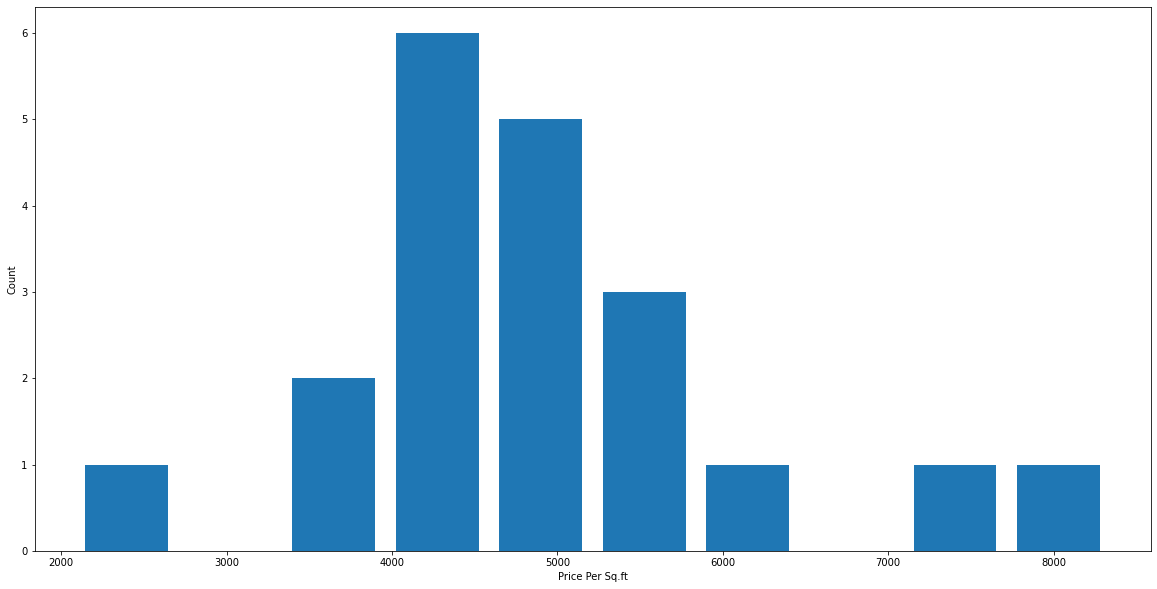

In [42]:
# function for plotting the histogram
def plot_histogram(df, location, width):
    plt.hist(df[df.location == location].price_per_sqft, rwidth = width)
    plt.xlabel("Price Per Sq.ft")
    plt.ylabel("Count")

# for location in dataframe9.location.unique():
location = "Kaval Byrasandra"
plot_histogram(dataframe9, location, 0.8)

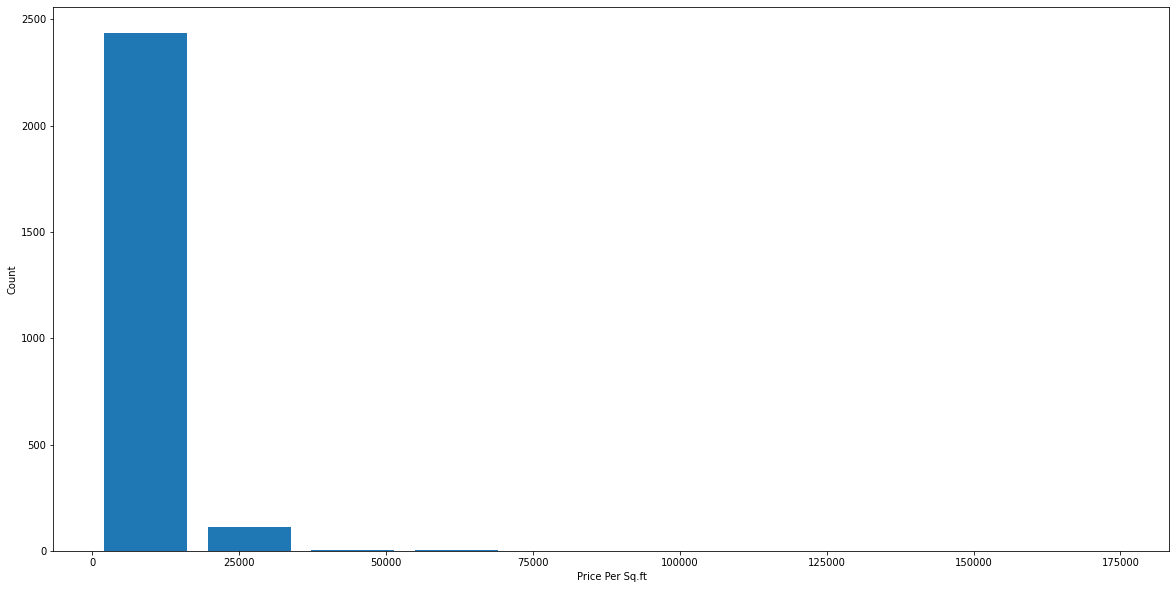

In [43]:
location = "other"
plot_histogram(dataframe9, location, 0.8)

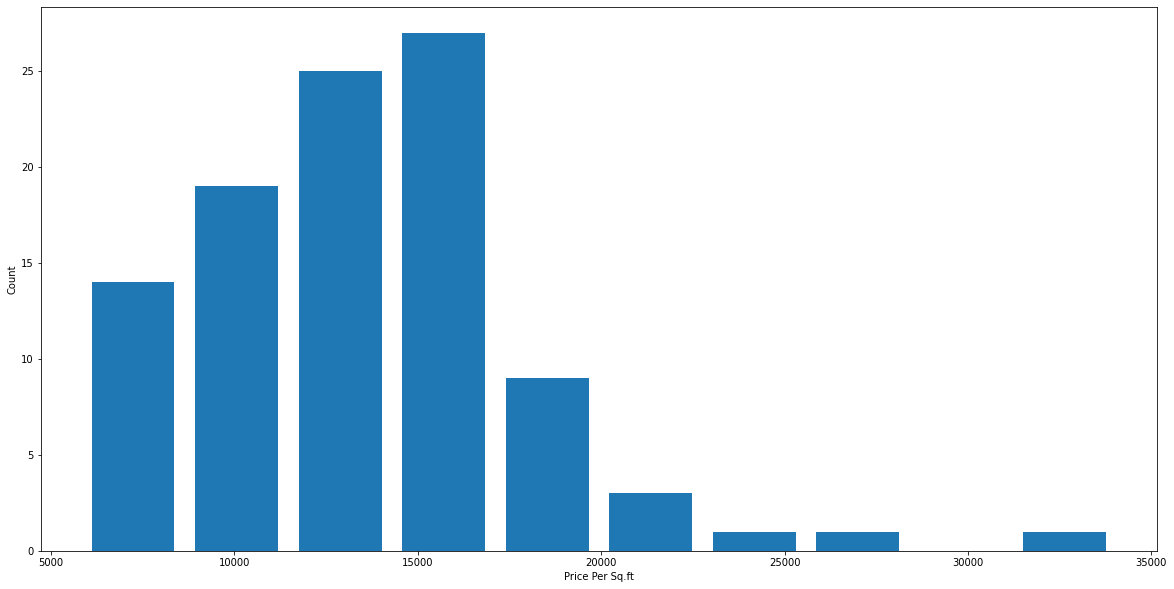

In [44]:
location = "Rajaji Nagar"
plot_histogram(dataframe9, location, 0.8)

In [45]:
#lets check the size of the current dataframe
dataframe9.shape

(12456, 7)

In [46]:
# function to remove the outliers using the price_per_sqft as
def price_per_sqft_outliers_removal(df):
    dataframe_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean + std))] # 1 Sigma value i.e 68% of data
        dataframe_out = pd.concat([dataframe_out,reduced_df],ignore_index=True) # Storing data in 'df_out' dataframe
    return dataframe_out

dataframe10 = price_per_sqft_outliers_removal(dataframe9)
dataframe10.shape

(10242, 7)

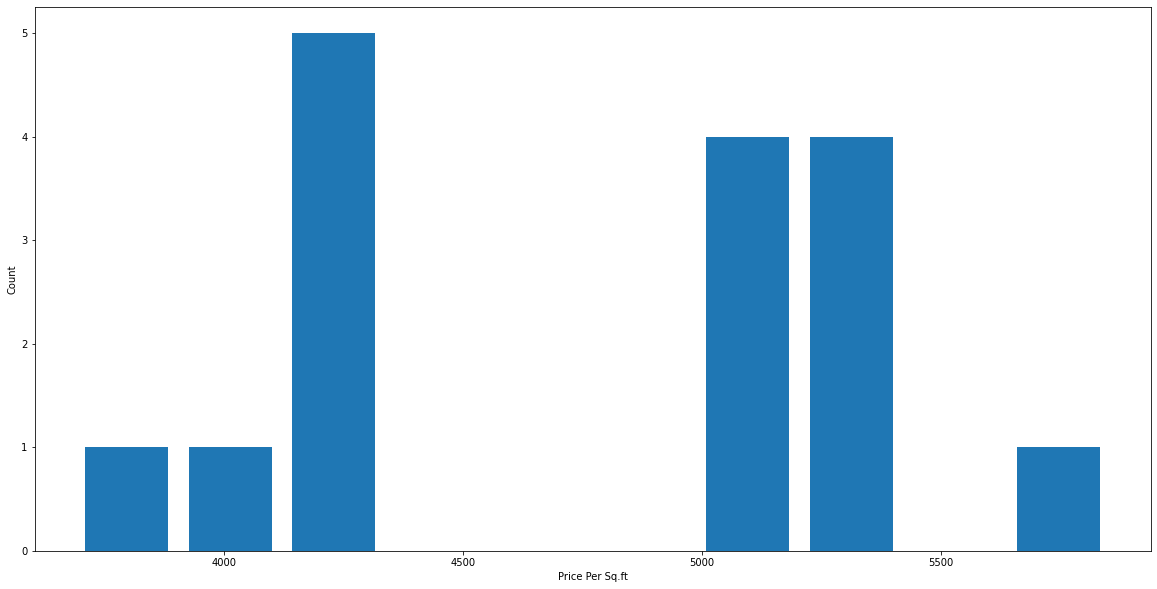

In [47]:
# lets visualize the 'price_per_sqft' after removal of outliers for various locations as
location = "Kaval Byrasandra"
plot_histogram(dataframe10, location, 0.8)

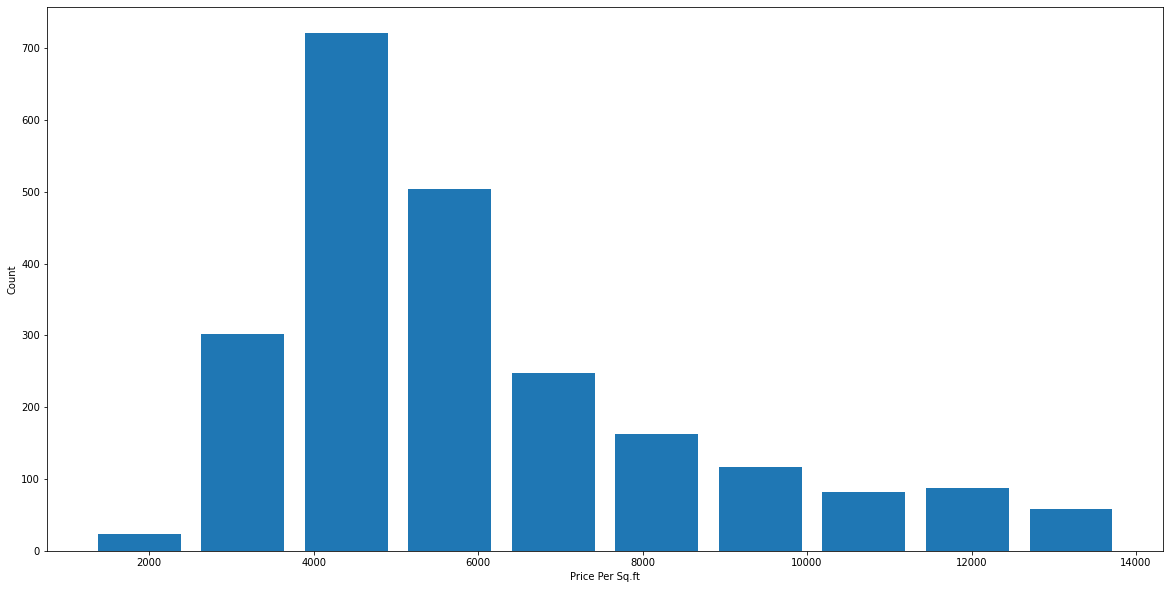

In [48]:
location = "other"
plot_histogram(dataframe10, location, 0.8)

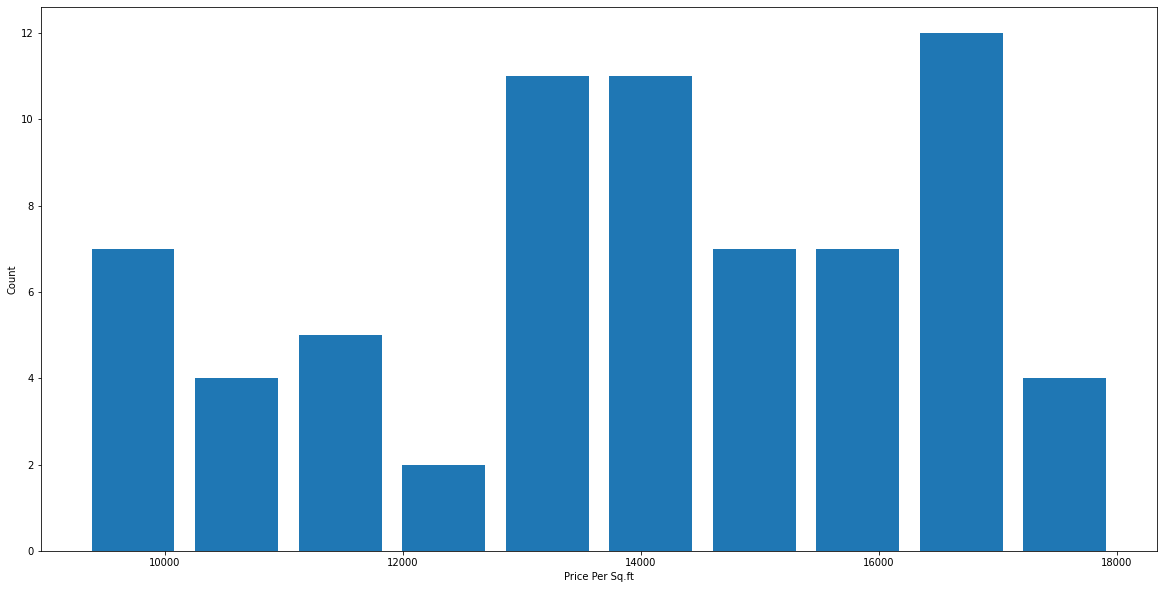

In [49]:
location = "Rajaji Nagar"
plot_histogram(dataframe10, location, 0.8)

* The price of the 3 BHK should be more than the 2 BHK if the location and square foot area is same. If there are datapoints with same location having price of 2 BHK is more than 3 BHK, then these datapoints will be treated as an outliers.

##  Plotting the Scatter Graph

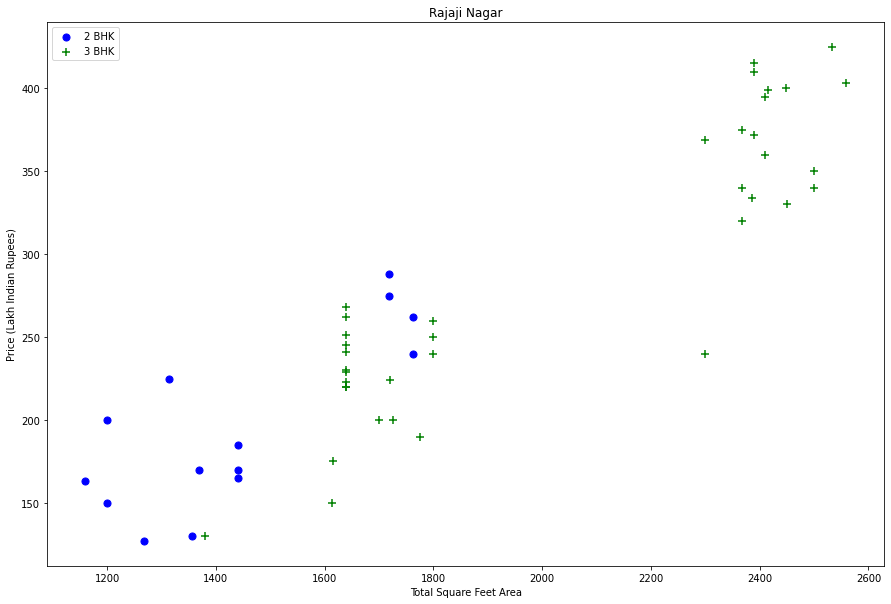

In [50]:
# lets visualise the datapoints for comparing the 2 BHK with 3 BHK for a specific location
def plot_scatter_graph(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_graph(dataframe10, "Rajaji Nagar")    

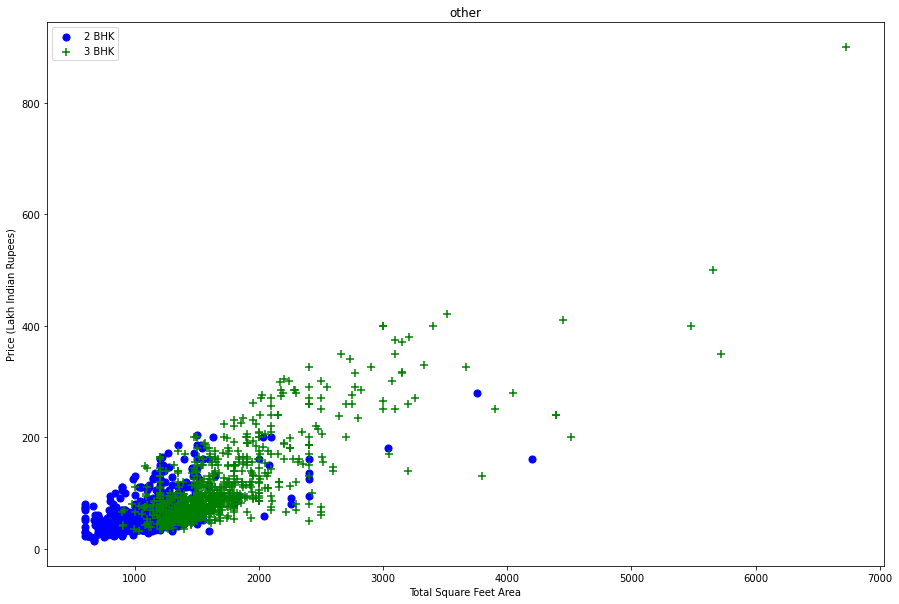

In [51]:
plot_scatter_graph(dataframe10, "other")

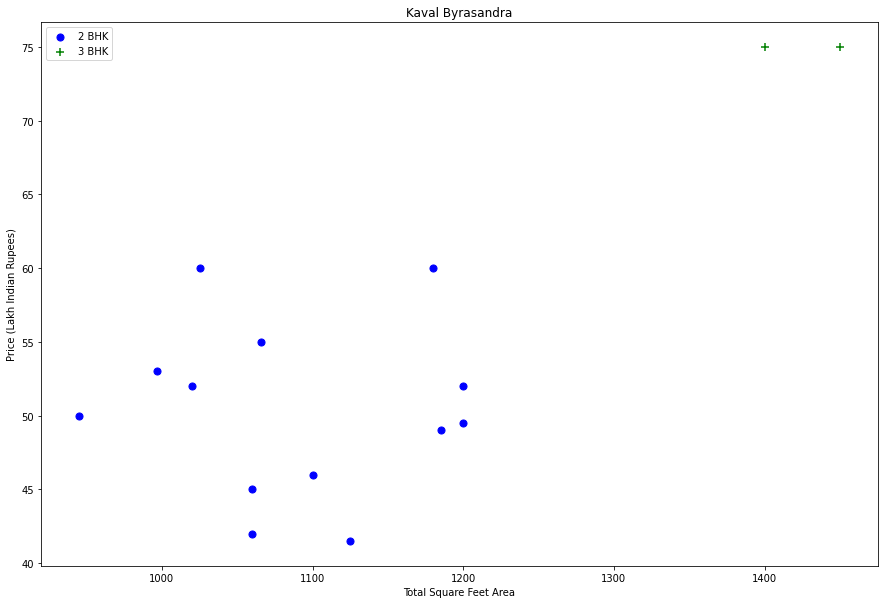

In [52]:
plot_scatter_graph(dataframe10, "Kaval Byrasandra")

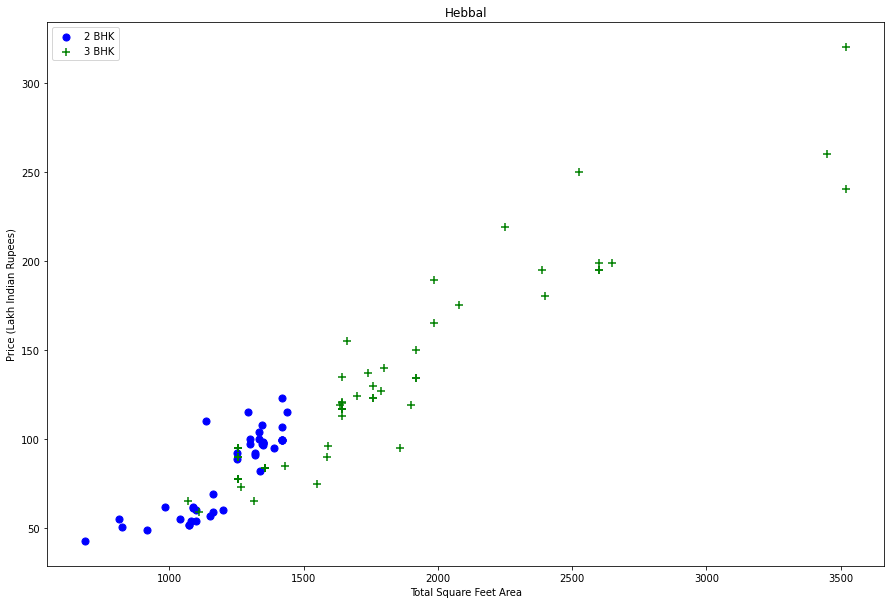

In [53]:
plot_scatter_graph(dataframe10, "Hebbal")

Here, we can clearly observe that some of the green points is higher than blue point even they having the same square feet area in the same location. So, these are clearly ouliers.
Inorder to remove those outliers, what we will do is for a given location, we will build a dictionary by name 'bhk_stats' with below values of 'price_per_sqft' as

   {
        '1' : {
            'mean': 4000,
            'std: 2000,
            'count': 34
        },
        '2' : {
            'mean': 4300,
            'std: 2300,
            'count': 22
        },    
   }
Hence, we will remove those 2 BHK apartment whose price_per_sqft is less than mean of price_per_sqft of 1 BHK apartment.

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

dataframe11 = remove_bhk_outliers(dataframe10)
dataframe11.shape

(7317, 7)

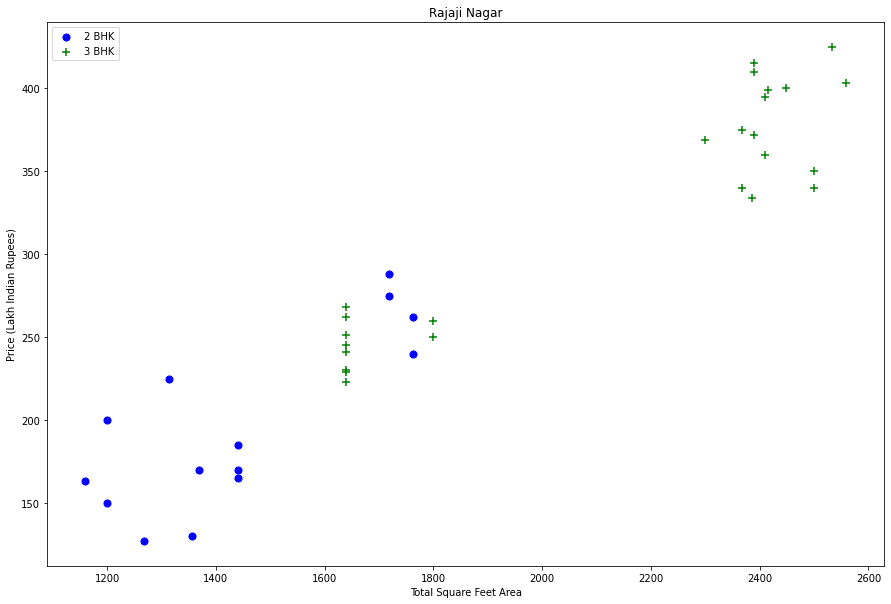

In [55]:
#lets plot the same scatter graph again in order to visualize the price_per_sqft for 2 BHK and 3 BHK
location = "Rajaji Nagar"
plot_scatter_graph(dataframe11, location)

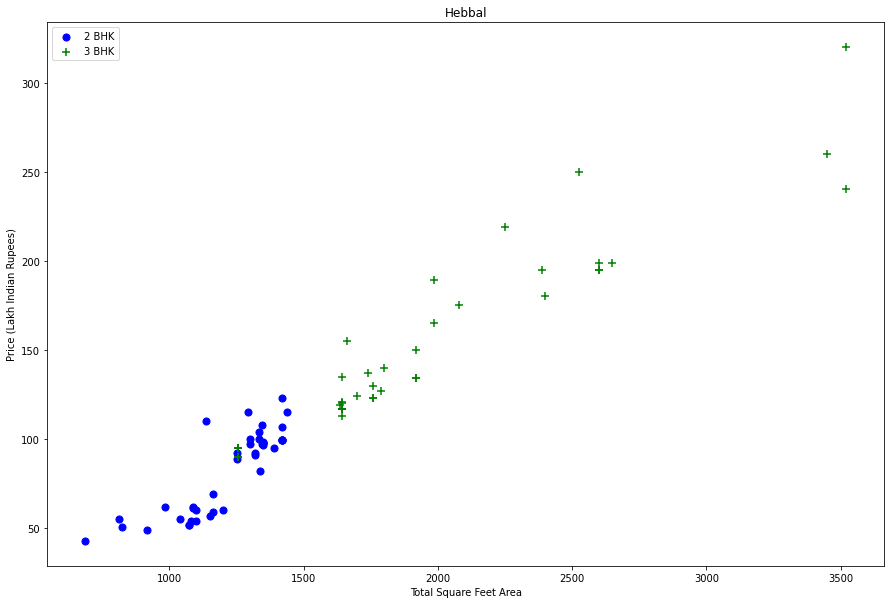

In [56]:
location = "Hebbal"
plot_scatter_graph(dataframe11, location)

Text(0, 0.5, 'Count')

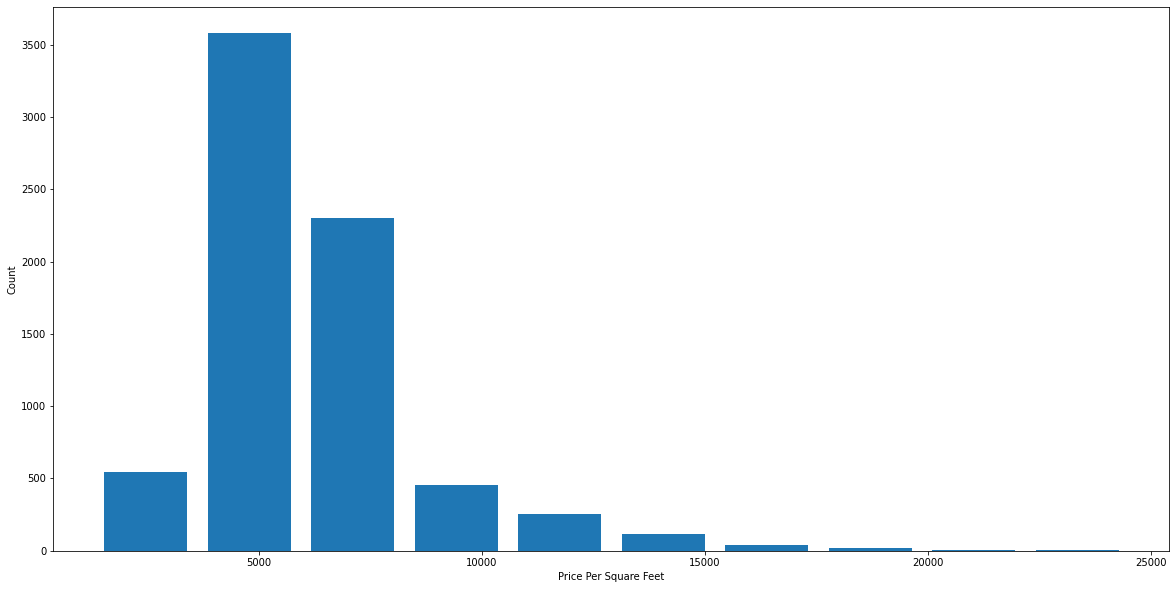

In [57]:
#Now lets plot the histogram and visualize the price_per_sqft data after outlier removal

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataframe11.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

There are some datapoints in which for a particular apartments the no of bathrooms are very much learger than the no of bedrooms, more specifically, if no of bathroom > no of BHK + 2, then this datapoint is clearly an outlier

In [58]:
#Getting unique bath from dataset
dataframe11.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
#Getting the training examples where no of bath are more than (no of BHK +2)
dataframe11[dataframe11.bath > dataframe11.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [60]:
#Lets check current dataset shape before removing outliers
dataframe11.shape

(7317, 7)

In [61]:
# Remove the outliers with more than (no of BHK + 2) bathrooms
dataframe12 = dataframe11[dataframe11.bath < (dataframe11.bhk + 2)]
dataframe12.shape

(7239, 7)

Thus now the dataset get cleaned and the columns that we introduced like 'bhk' and 'price_per_sqft' are of no need as they only required in order to detect the outliers. But since we have 'bhk' feature we will drop 'size' feature.

In [62]:
dataframe13 = dataframe12.drop(['size', 'price_per_sqft'], axis = 'columns')
dataframe13.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Since, the location column is a text column, we need to change it to the numerical column so that we can easily use it for building the model. Upto now, we have cleaned the dataset alot and we need to do this final cleaning of location column which can be easily implemented by the process of One Hot Encoding. 

## conversion of 'location' column from text to numeric using one hot encoding 

* Since we have 'location' as categorical feature lets use One Hot Encoding to create separate column for each location category and assign binary value 1 or 0

In [63]:
# we use panda for creating dummies of each categorical value of location
dummies = pd.get_dummies(dataframe13.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# There may arise a problem known as Dummy variable trap problem, to avoid this we will drop one dummy variable column
dummies = dummies.drop(['other'],axis='columns')
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# lets add dummies dataframe to original dataframe
dataframe14 = pd.concat([dataframe13, dummies], axis = "columns")
dataframe14.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# As we heave created dummy catergorical values of the 'location' column, so there is no need of it and can be dropped
dataframe15 = dataframe14.drop(['location'], axis = "columns")
dataframe15.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step6: Finally lets build the Machine Learning Model

In [67]:
#Final shape of our dataset is
dataframe15.shape

(7239, 244)

Now lets create X(independent variable/features) and y(dependent variables/target) from the final dataset

In [68]:
# Independent Variables
X = dataframe15.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Dependent Variable
Y = dataframe15.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## Splitting of the dataset for training and testing the dataset 

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('Y_train shape = ',Y_train.shape)
print('Y_test shape = ',Y_test.shape)

X_train shape =  (5791, 243)
X_test shape =  (1448, 243)
Y_train shape =  (5791,)
Y_test shape =  (1448,)


## Performing Linear Regression
* Testing the score we get with Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression

#create linear regression object
linearRegression_Model = LinearRegression()

#train the model using the traing sets
linearRegression_Model.fit(X_train, Y_train)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(linearRegression_Model.score(X_test, Y_test)), "\n")

# from sklearn.linear_model import LinearRegression
# LinearRegression_Classifier = LinearRegression()
# LinearRegression_Classifier.fit(X_train, Y_train)
# LinearRegression_Classifier.score(X_test, Y_test)

Variance score: 0.8629132245229443 



In [83]:
#print the regression coefficients
print("Coefficients are: ", linearRegression_Model.coef_)

Coefficients are:  [ 8.01179032e-02  3.71694671e+00 -1.50202644e+00  1.20968537e+02
  2.45037670e+00 -5.29380959e+01  1.02788383e+02 -7.03146246e+01
 -3.89299631e+01 -1.85179731e+01 -1.81540697e+01 -4.72181903e+01
 -4.55005897e+01 -3.59209534e+01 -5.25789908e+01 -4.21299763e+01
 -2.79617748e+01 -2.96745769e+01 -3.37243927e+01 -4.30523354e+01
 -4.63572753e+01 -3.53450116e+01 -5.04870285e+01 -4.31831077e+01
 -3.37223267e+01 -3.49151967e+01 -1.91070208e+01  4.95276158e+00
 -4.11542129e+01 -5.20629169e+01 -2.93242196e+01 -1.62662047e+01
 -3.25217236e+01  8.45740507e+01 -3.40426878e+01 -6.15425453e+01
 -6.13320691e+01 -3.06144991e+01 -3.36020349e+01 -1.34178998e+01
 -3.20742334e+01  2.94946931e+01 -3.20698342e-01 -4.93174749e+01
 -4.54625244e+01 -5.58189272e+01 -3.31242244e+01  1.19335410e+02
 -4.54819617e+01 -3.09336005e+01 -2.33894756e+01  1.00442670e-02
 -3.86470982e+01 -4.55335854e+01 -4.69654900e+01 -5.92550733e+01
  4.16783456e+00 -2.01314575e+01 -3.95753039e+01 -3.16579360e+01
  1.94

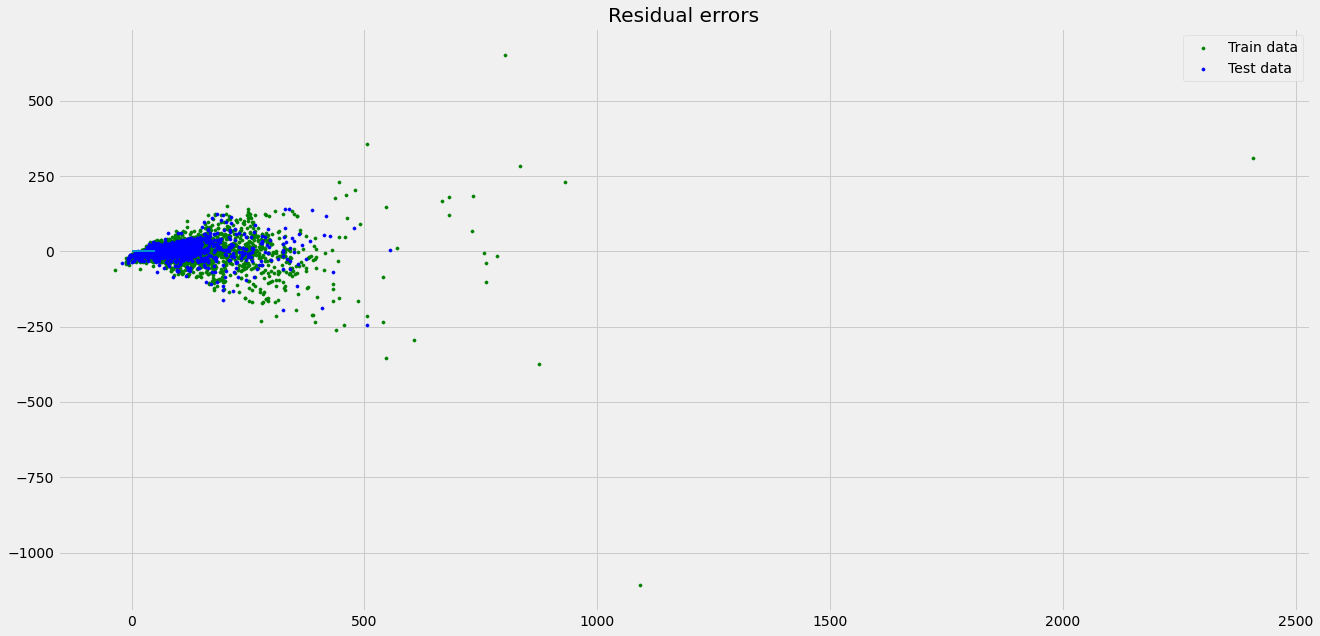

In [84]:
# lets plot the graph for residual errors in train and test dataset
def visualize_prediction(model):
    # setting plot style
    plt.style.use('fivethirtyeight')

    # plotting residual errors in training data
    plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train,
                color = "green", s = 10, label = 'Train data')

    # plotting residual errors in test data
    plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test,
                color = "blue", s = 10, label = 'Test data')

    # plotting line for zero residual error
    plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

    # plotting legend
    plt.legend(loc = 'upper right')

    # plot title
    plt.title("Residual errors")

    # method call for showing the plot
    plt.show()

    
# visualize the linear Regression model we built above    
visualize_prediction(linearRegression_Model)   

## Performing Decision Tree Regression

* Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. 
* Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

*  Discrete output example: A weather prediction model that predicts whether or not there’ll be rain in a particular day.

* Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.

Here, continuous values are predicted with the help of a decision tree regression model.

In [85]:
from sklearn.tree import DecisionTreeRegressor

# create object of Decision Tree Regressor
decisionTree_Model = DecisionTreeRegressor(random_state = False)

#Training the model using training dataset
decisionTree_Model.fit(X_train, Y_train)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(decisionTree_Model.score(X_test, Y_test)), "\n")


Variance score: 0.7055059665968613 



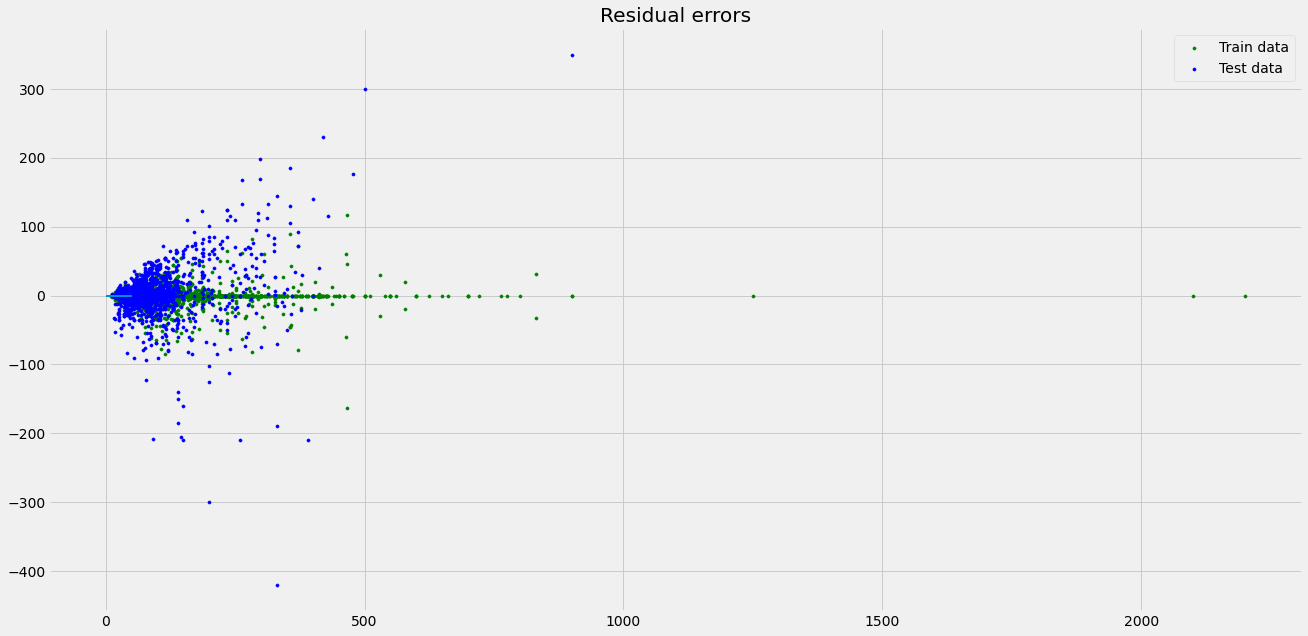

In [86]:
# visualize the Decision Tree Regression model we built above    
visualize_prediction(decisionTree_Model) 

## Performing Random Forest Regression

* A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging.

* The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

* Random Forest has multiple decision trees as base learning models.

* We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [87]:
from sklearn.ensemble import RandomForestRegressor

#create the Regressor object
randomForest_Model = RandomForestRegressor(random_state = False)

#training the model
randomForest_Model.fit(X_train, Y_train)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(randomForest_Model.score(X_test, Y_test)), "\n")


Variance score: 0.7739237922684291 



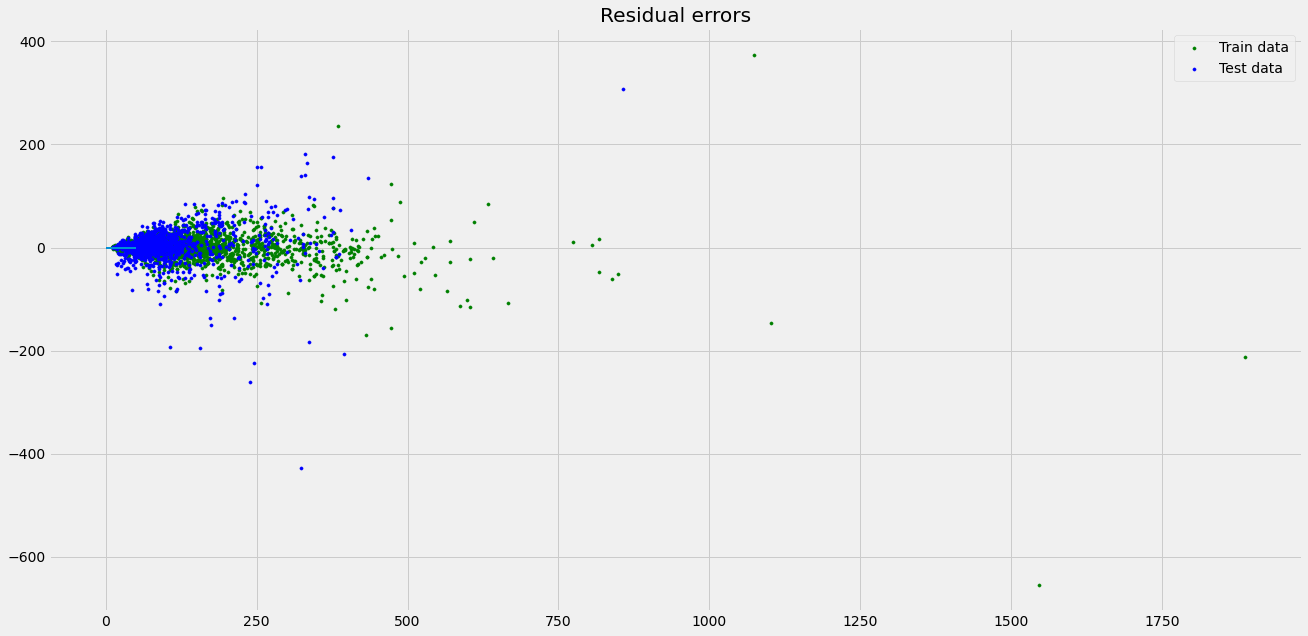

In [88]:
# visualize the Random Forest Regression model we built above    
visualize_prediction(randomForest_Model) 

## Measuring the Accuracy of the Regression Models using K Fold cross validation
* we will use the sklearn cross_val_score function

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [90]:
# Cross-Validation scores for Linear Regression Model
cross_val_score(LinearRegression(), X, Y, cv = cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [91]:
# Cross-Validation scores for Decision Tree Regression Model
cross_val_score(DecisionTreeRegressor(), X, Y, cv = cv)

array([0.82445789, 0.75582373, 0.55980402, 0.64738255, 0.76845876])

In [92]:
# Cross-Validation scores for Random Forest Regression Model
cross_val_score(RandomForestRegressor(), X, Y, cv = cv)

array([0.84286289, 0.83969019, 0.77380034, 0.62090115, 0.83691347])

## Finding out the best model to use using GridSearchCV

* We apply the dataset on the linear regression, Decision tree and Random Forest Algorithm or model in order to compare which model is giving the best accuracy.

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


def get_accurate_model_using_GSCV(X, Y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
#                 'max_depth': [3, None],
#                 'max_features': [1, 3, 10],
#                 'min_samples_split': [1, 3, 10],
#                 'min_samples_leaf': [1, 3, 10],
                'criterion': ['mse', 'friedman_mse']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

get_accurate_model_using_GSCV(X, Y)


,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,decision_tree,0.718038,"{'criterion': 'mse', 'splitter': 'best'}"
2,random_forest,0.785720,{'criterion': 'mse'}


Here, We clearly observe that linear regression model has higher accuracy than that of the other model like random forest and decision tree.Hence, we are going to use the linear regression algorithm for building our model.

## lets write the final prediction function using the model we built above. 

In [95]:
# function give us the final predicted price of the house
def get_predicted_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return linearRegression_Model.predict([x])[0]

get_predicted_price('Indira Nagar',1000, 3, 3)

195.52689759854664

In [96]:
get_predicted_price('Indira Nagar',1000, 2, 2)

193.311977331799

## Finally, Export the model to a Pickle file 

In [97]:
import pickle

with open('Real_Estate_Price_Prediction.pickle', 'wb') as f:
    pickle.dump(linearRegression_Model, f)

In [98]:
# Exporting the final list of all the columns in our feature set
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))